# **Predict weight from height - Linear Regression (1 feature)**

* Goal: Build a simple linear regression model to predict weight $(y)$ from height $(x)$.
* Dataset: 
* Author's contact: quanghuy71847@gmail.com 

## **1. Assumptions**
* The fact is that we cannot predict a person's `weight` through their `height`, because `weight` depends on many other factors. 
* However, base on the notebook purpose is using **Linear Regression** model to solve the problem, we assume that it can be predicted.

## **2. Install library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals

## **3. Prepare data**

In [3]:
df = pd.read_csv("./data.csv")

Given a dataset about human's **height (cm)** and **weight (kg)** of 15 people

In [4]:
df

,height,weight
0,147.0,49.0
1,148.1,49.5
2,150.0,50.0
3,152.5,50.8
4,153.0,51.0
5,155.0,52.0
6,158.0,54.0
7,160.0,56.0
8,161.0,56.5
9,163.0,58.0


* To check the accuracy of the found model, we will keep the 155 cm and 160 cm data points for testing, the remaining dataset are used to train the model.

In [5]:
test_df = df[df['height'].isin([155, 160])]
train_df = df[~df['height'].isin([155, 160])]

## **4. Data visualization**

In [6]:
X = train_df[['height']].values
print(f"Shape (row, col): {X.shape}")
X

Shape (row, col): (18, 1)


array([[147. ],
       [148.1],
       [150. ],
       [152.5],
       [153. ],
       [158. ],
       [161. ],
       [163. ],
       [165. ],
       [166. ],
       [168. ],
       [170. ],
       [173. ],
       [175. ],
       [178. ],
       [180. ],
       [182.3],
       [183. ]])

In [7]:
Y = train_df[['weight']].values
print(f"Shape (row, col): {Y.shape}")
Y

Shape (row, col): (18, 1)


array([[49. ],
       [49.5],
       [50. ],
       [50.8],
       [51. ],
       [54. ],
       [56.5],
       [58. ],
       [59. ],
       [59.3],
       [60. ],
       [72. ],
       [63. ],
       [64. ],
       [66. ],
       [67. ],
       [67.7],
       [68. ]])

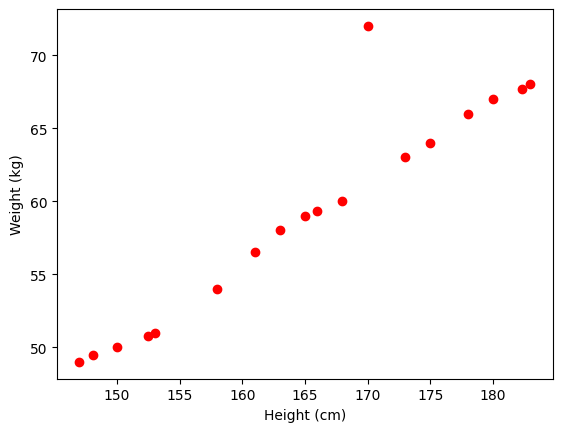

In [11]:
plt.plot(X, Y, 'ro')
# plt.axis([140, 190, 40, 80])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## **5. Solution**

From this graph, we can see that the data is arranged almost in a straight line (except the `outlier` $x = 170, y = 72$).

So the **Linear Regression** most likely to give a good results with this `hypothesis`:
$$
\hat{y} = \theta_1 \cdot x + \theta_0
$$

or, in words: 
$$
\text{(predicted weight)} = \theta_1 \cdot \text{(given height)} + \theta_0
$$

After defining the `hypothesis`, we need to initialize a random `theta` and calculate `predicted weight`.
$$
with \quad \theta_1 = 1, \, \theta_0 = 1 \Longrightarrow \boxed{\hat{y} = x + 1} \quad \text{a simple model}
$$

Apply the found model and compare predicted vs actual values:

| Height $(x)$ | Actual Weight $(y)$ | Predicted $(\hat{y})$ | Error $(y - \hat{y})$ | Squared Error |
|--------------|---------------------|-----------------------|-----------------------|---------------|
| 147          | 49                  | 148                   | -99                   | 9801          |
| 150          | 50                  | 151                   | -101                  | 10201         |
| 153          | 51                  | 154                   | -103                  | 10609         |
| ...          | ..                  | ...                   |  ...                  | ...           |

In [24]:
df['predicted'] = df['height'] + 1
df['error'] = df['weight'] - df['predicted']
df['square_error'] = df['error'] * df['error']
df

,height,weight,predicted,error,square_error
0,147,49,148,-99,9801
1,150,50,151,-101,10201
2,153,51,154,-103,10609
3,155,52,156,-104,10816
4,158,54,159,-105,11025
5,160,56,161,-105,11025
6,163,58,164,-106,11236
7,165,59,166,-107,11449
8,168,60,169,-109,11881
9,170,72,171,-99,9801


Finally, the **MSE (Mean Squared Error)** is:

In [25]:
mse = df['square_error'].mean()
print("MSE = ", mse)

MSE =  11462.0


We can easily realize that $MSE = 11462.0$ (when $\theta_0 = 1, \theta_1 = 1$) is really large.  
Therefore, our goal is to find $\theta_1, \theta_0$ that **minimizes** the loss function $MSE$.  

There are two main approaches:

1. **Analytical solution: Normal Equation**  
   By setting the derivative of the loss function to zero, we obtain a closed-form solution:  

   $$
   \theta = (X^\top X)^{-1} X^\top y
   $$

   where $X$ is the design matrix with a column of ones (for bias term $\theta_0$) and the feature values.  

   With $m$ samples, matrix $X \in \R^{m \times n}$, parament vector $\theta \in \R^n$ and label vector $y \in \R^m$, loss function we be defined as:

   $$
   J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}
   $$


2. **Iterative optimization: Gradient Descent**  
   Instead of solving directly, we can update parameters step by step using the gradient of the loss function:  

   $$
   \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
   $$

   where $\alpha$ is the **learning rate**. This method is useful when the number of features is very large or the normal equation becomes computationally expensive.  